In [1]:
import pandas as pd

# Load the datasets
cardio_df = pd.read_csv('cardio_train.csv', delimiter=";")
sleep_df = pd.read_csv('sleep_cleaned.csv')

# Display the first few rows and column names of each dataset to understand the structure
cardio_df_info = cardio_df.head(), cardio_df.columns
sleep_df_info = sleep_df.head(), sleep_df.columns

cardio_df_info, sleep_df_info


((   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
  0   0  18393       2     168    62.0    110     80            1     1      0   
  1   1  20228       1     156    85.0    140     90            3     1      0   
  2   2  18857       1     165    64.0    130     70            3     1      0   
  3   3  17623       2     169    82.0    150    100            1     1      0   
  4   4  17474       1     156    56.0    100     60            1     1      0   
  
     alco  active  cardio  
  0     0       1       0  
  1     0       1       1  
  2     0       0       1  
  3     0       1       1  
  4     0       0       0  ,
  Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
         'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
        dtype='object')),
 (  Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
  0   Male   27     Software Engineer             6.1                 6   
  1   Male   28     

In [3]:
# Re-import cardio_train with the correct delimiter
cardio_df = pd.read_csv('cardio_train.csv', delimiter=';')

# Convert age from days to years
cardio_df['age'] = cardio_df['age'] // 365

# Calculate BMI and add as a new column
cardio_df['BMI'] = cardio_df['weight'] / ((cardio_df['height'] / 100) ** 2)

# Rename columns to match the sleep dataset
cardio_df.rename(columns={'ap_hi': 'bp_upper', 'ap_lo': 'bp_lower'}, inplace=True)

# Display the updated cardio_train dataframe with the new columns
cardio_df.head()


,id,age,gender,height,weight,bp_upper,bp_lower,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [4]:
# Map cardio gender codes to match sleep dataset's labels
gender_map = {1: 'Male', 2: 'Female'}
cardio_df['gender'] = cardio_df['gender'].map(gender_map)

# Merge the datasets on age, gender, bp_upper, and bp_lower
merged_df = pd.merge(cardio_df, sleep_df, left_on=['age', 'gender', 'bp_upper', 'bp_lower'], 
                     right_on=['Age', 'Gender', 'bp_upper', 'bp_lower'], how='inner')

# Display the first few rows of the merged dataset
merged_df.head()


,id,age,gender,height,weight,bp_upper,bp_lower,cholesterol,gluc,smoke,...,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,7078,52,Female,172,76.0,125,80,3,3,0,...,52,Engineer,8.4,9,30,3,Normal,65,5000,No Disorder
1,7078,52,Female,172,76.0,125,80,3,3,0,...,52,Engineer,8.4,9,30,3,Normal,65,5000,No Disorder
2,7078,52,Female,172,76.0,125,80,3,3,0,...,52,Engineer,8.4,9,30,3,Normal,65,5000,No Disorder
3,8850,29,Male,175,59.0,120,80,1,1,0,...,29,Doctor,7.8,7,75,6,Normal,70,8000,No Disorder
4,8850,29,Male,175,59.0,120,80,1,1,0,...,29,Doctor,7.8,7,75,6,Normal,70,8000,No Disorder


In [5]:
merged_df

,id,age,gender,height,weight,bp_upper,bp_lower,cholesterol,gluc,smoke,...,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,7078,52,Female,172,76.0,125,80,3,3,0,...,52,Engineer,8.4,9,30,3,Normal,65,5000,No Disorder
1,7078,52,Female,172,76.0,125,80,3,3,0,...,52,Engineer,8.4,9,30,3,Normal,65,5000,No Disorder
2,7078,52,Female,172,76.0,125,80,3,3,0,...,52,Engineer,8.4,9,30,3,Normal,65,5000,No Disorder
3,8850,29,Male,175,59.0,120,80,1,1,0,...,29,Doctor,7.8,7,75,6,Normal,70,8000,No Disorder
4,8850,29,Male,175,59.0,120,80,1,1,0,...,29,Doctor,7.8,7,75,6,Normal,70,8000,No Disorder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,94526,52,Female,176,85.0,125,80,1,1,0,...,52,Engineer,8.4,9,30,3,Normal,65,5000,No Disorder
191,97457,51,Female,174,74.0,125,80,1,1,0,...,51,Engineer,8.5,9,30,3,Normal,65,5000,No Disorder
192,97457,51,Female,174,74.0,125,80,1,1,0,...,51,Engineer,8.5,9,30,3,Normal,65,5000,No Disorder
193,97457,51,Female,174,74.0,125,80,1,1,0,...,51,Engineer,8.5,9,30,3,Normal,65,5000,No Disorder


In [6]:
# Rename the 'age' column in cardio_df to 'Age' for clarity in the merge process
cardio_df.rename(columns={'age': 'Age_Cardio'}, inplace=True)

# Merge the datasets again
merged_df = pd.merge(cardio_df, sleep_df, left_on=['Age_Cardio', 'gender', 'bp_upper', 'bp_lower'], 
                     right_on=['Age', 'Gender', 'bp_upper', 'bp_lower'], how='inner')

# Display the first few rows of the merged dataset
merged_df

,id,Age_Cardio,gender,height,weight,bp_upper,bp_lower,cholesterol,gluc,smoke,...,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,7078,52,Female,172,76.0,125,80,3,3,0,...,52,Engineer,8.4,9,30,3,Normal,65,5000,No Disorder
1,7078,52,Female,172,76.0,125,80,3,3,0,...,52,Engineer,8.4,9,30,3,Normal,65,5000,No Disorder
2,7078,52,Female,172,76.0,125,80,3,3,0,...,52,Engineer,8.4,9,30,3,Normal,65,5000,No Disorder
3,8850,29,Male,175,59.0,120,80,1,1,0,...,29,Doctor,7.8,7,75,6,Normal,70,8000,No Disorder
4,8850,29,Male,175,59.0,120,80,1,1,0,...,29,Doctor,7.8,7,75,6,Normal,70,8000,No Disorder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,94526,52,Female,176,85.0,125,80,1,1,0,...,52,Engineer,8.4,9,30,3,Normal,65,5000,No Disorder
191,97457,51,Female,174,74.0,125,80,1,1,0,...,51,Engineer,8.5,9,30,3,Normal,65,5000,No Disorder
192,97457,51,Female,174,74.0,125,80,1,1,0,...,51,Engineer,8.5,9,30,3,Normal,65,5000,No Disorder
193,97457,51,Female,174,74.0,125,80,1,1,0,...,51,Engineer,8.5,9,30,3,Normal,65,5000,No Disorder


In [7]:
merged_df.to_csv('cardio_sleep_merged.csv', index=False)

# With the newly merged dataset

In [8]:
data = pd.read_csv('cardio_sleep_merged.csv')
data

,id,Age_Cardio,gender,height,weight,bp_upper,bp_lower,cholesterol,gluc,smoke,...,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,7078,52,Female,172,76.0,125,80,3,3,0,...,52,Engineer,8.4,9,30,3,Normal,65,5000,No Disorder
1,7078,52,Female,172,76.0,125,80,3,3,0,...,52,Engineer,8.4,9,30,3,Normal,65,5000,No Disorder
2,7078,52,Female,172,76.0,125,80,3,3,0,...,52,Engineer,8.4,9,30,3,Normal,65,5000,No Disorder
3,8850,29,Male,175,59.0,120,80,1,1,0,...,29,Doctor,7.8,7,75,6,Normal,70,8000,No Disorder
4,8850,29,Male,175,59.0,120,80,1,1,0,...,29,Doctor,7.8,7,75,6,Normal,70,8000,No Disorder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,94526,52,Female,176,85.0,125,80,1,1,0,...,52,Engineer,8.4,9,30,3,Normal,65,5000,No Disorder
191,97457,51,Female,174,74.0,125,80,1,1,0,...,51,Engineer,8.5,9,30,3,Normal,65,5000,No Disorder
192,97457,51,Female,174,74.0,125,80,1,1,0,...,51,Engineer,8.5,9,30,3,Normal,65,5000,No Disorder
193,97457,51,Female,174,74.0,125,80,1,1,0,...,51,Engineer,8.5,9,30,3,Normal,65,5000,No Disorder


In [9]:
data.columns

Index(['id', 'Age_Cardio', 'gender', 'height', 'weight', 'bp_upper',
       'bp_lower', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'BMI', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [22]:
import pandas as pd

# Load the datasets
cardio_df = pd.read_csv('cardio_train.csv', delimiter=";")
sleep_df = pd.read_csv('sleep_cleaned.csv')

# Preview the datasets to understand their structure
cardio_df.head(), sleep_df.head()


(   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
 0   0  18393       2     168    62.0    110     80            1     1      0   
 1   1  20228       1     156    85.0    140     90            3     1      0   
 2   2  18857       1     165    64.0    130     70            3     1      0   
 3   3  17623       2     169    82.0    150    100            1     1      0   
 4   4  17474       1     156    56.0    100     60            1     1      0   
 
    alco  active  cardio  
 0     0       1       0  
 1     0       1       1  
 2     0       0       1  
 3     0       1       1  
 4     0       0       0  ,
   Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
 0   Male   27     Software Engineer             6.1                 6   
 1   Male   28                Doctor             6.2                 6   
 2   Male   28                Doctor             6.2                 6   
 3   Male   28  Sales Representative             5.9 

In [33]:
# Convert age from days to years in cardio_df
cardio_df['age_years'] = cardio_df['age'] // 365

# Rename the blood pressure columns in cardio_df
cardio_df.rename(columns={'ap_hi': 'bp_upper', 'ap_lo': 'bp_lower'}, inplace=True)

# Calculate BMI using height (in cm) and weight (in kg): BMI = weight / (height/100)^2
cardio_df['BMI'] = cardio_df['weight'] / (cardio_df['height'] / 100) ** 2

cardio_df['gender'] = cardio_df['gender'].astype(str)
sleep_df['Gender'] = sleep_df['Gender'].astype(str)

cardio_df['bp_upper'] = pd.to_numeric(cardio_df['bp_upper'], errors='coerce')
cardio_df['bp_lower'] = pd.to_numeric(cardio_df['bp_lower'], errors='coerce')
sleep_df['bp_upper'] = pd.to_numeric(sleep_df['bp_upper'], errors='coerce')
sleep_df['bp_lower'] = pd.to_numeric(sleep_df['bp_lower'], errors='coerce')

combined_df = pd.merge(sleep_df, cardio_df, right_on=['age_years',  'bp_upper', 'bp_lower'], 
                       left_on=['Age', 'bp_upper', 'bp_lower'], how='left')


# Merge the datasets on age (years), gender, and blood pressure values (to find close matches)
# combined_df = pd.merge(cardio_df, sleep_df, left_on=['age_years', 'gender', 'bp_upper', 'bp_lower'], 
#                        right_on=['Age', 'Gender', 'bp_upper', 'bp_lower'], how='outer')

# Check for missing values in the merged dataset
missing_values = combined_df.isnull().sum()

# Show the first few rows of the combined dataset and missing values
combined_df.head(), missing_values


(  Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
 0   Male   27     Software Engineer             6.1                 6   
 1   Male   28                Doctor             6.2                 6   
 2   Male   28                Doctor             6.2                 6   
 3   Male   28  Sales Representative             5.9                 4   
 4   Male   28  Sales Representative             5.9                 4   
 
    Physical Activity Level  Stress Level BMI Category  Heart Rate  \
 0                       42             6   Overweight          77   
 1                       60             8       Normal          75   
 2                       60             8       Normal          75   
 3                       30             8        Obese          85   
 4                       30             8        Obese          85   
 
    Daily Steps  ... height  weight  cholesterol  gluc  smoke alco  active  \
 0         4200  ...    NaN     NaN          NaN   NaN

In [34]:
combined_df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,...,height,weight,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,...,148.0,94.0,1.0,2.0,0.0,0.0,1.0,1.0,59.0,42.914536
804,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,...,148.0,94.0,1.0,2.0,0.0,0.0,1.0,1.0,59.0,42.914536
805,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,...,148.0,94.0,1.0,2.0,0.0,0.0,1.0,1.0,59.0,42.914536
806,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,...,148.0,94.0,1.0,2.0,0.0,0.0,1.0,1.0,59.0,42.914536


In [35]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   808 non-null    object 
 1   Age                      808 non-null    int64  
 2   Occupation               808 non-null    object 
 3   Sleep Duration           808 non-null    float64
 4   Quality of Sleep         808 non-null    int64  
 5   Physical Activity Level  808 non-null    int64  
 6   Stress Level             808 non-null    int64  
 7   BMI Category             808 non-null    object 
 8   Heart Rate               808 non-null    int64  
 9   Daily Steps              808 non-null    int64  
 10  Sleep Disorder           808 non-null    object 
 11  bp_upper                 808 non-null    int64  
 12  bp_lower                 808 non-null    int64  
 13  id                       594 non-null    float64
 14  age                      5

In [37]:
combined_df.to_csv('new_merged.csv', index=False)

# new merged dataset

In [71]:
import pandas as pd
data = pd.read_csv('new_merged.csv')

In [72]:
df = data.copy()
df.drop(['id','age','gender', 'age_years', 'BMI', 'height', 'weight'], axis=1, inplace=True)

In [73]:
df = df.rename(columns = {"cardio":"heart_risk"})

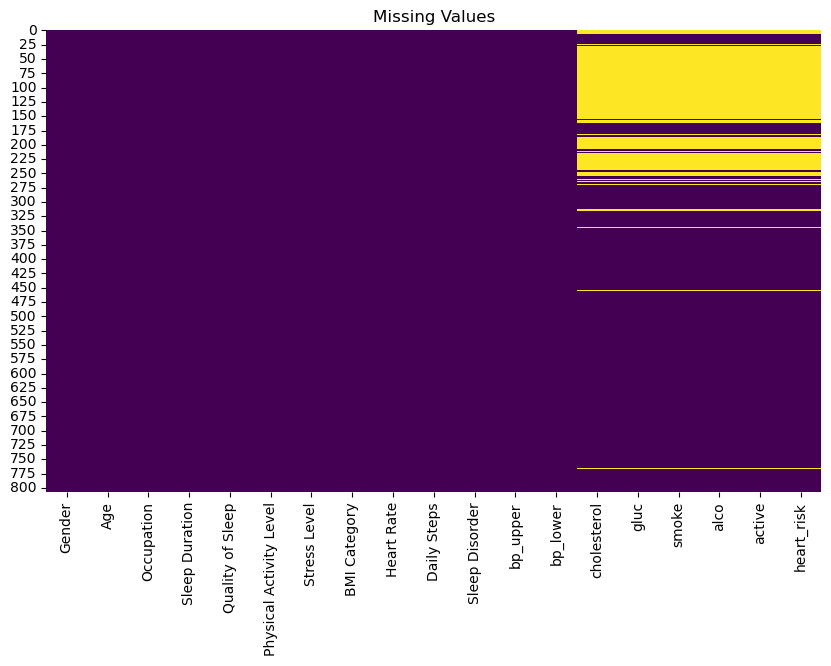

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")

plt.title("Missing Values")
plt.show()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   808 non-null    object 
 1   Age                      808 non-null    int64  
 2   Occupation               808 non-null    object 
 3   Sleep Duration           808 non-null    float64
 4   Quality of Sleep         808 non-null    int64  
 5   Physical Activity Level  808 non-null    int64  
 6   Stress Level             808 non-null    int64  
 7   BMI Category             808 non-null    object 
 8   Heart Rate               808 non-null    int64  
 9   Daily Steps              808 non-null    int64  
 10  Sleep Disorder           808 non-null    object 
 11  bp_upper                 808 non-null    int64  
 12  bp_lower                 808 non-null    int64  
 13  cholesterol              594 non-null    float64
 14  gluc                     5

In [76]:
# encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le_gender = LabelEncoder()
le_occupation = LabelEncoder()
le_bmi_category = LabelEncoder()
le_sleep_disorder = LabelEncoder()

# Encode the categorical variables
df1 = df.copy()
df1['Gender'] = le_gender.fit_transform(df1['Gender'])
df1['Occupation'] = le_occupation.fit_transform(df1['Occupation'])
df1['BMI Category'] = le_bmi_category.fit_transform(df1['BMI Category'])
df1['Sleep Disorder'] = le_sleep_disorder.fit_transform(df1['Sleep Disorder'])

# Display the encoded DataFrame
print(df1[['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']].head())


   Gender  Occupation  BMI Category  Sleep Disorder
0       1           9             2               1
1       1           1             0               1
2       1           1             0               1
3       1           6             1               2
4       1           6             1               2


In [77]:
df[['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']]

,Gender,Occupation,BMI Category,Sleep Disorder
0,Male,Software Engineer,Overweight,No Disorder
1,Male,Doctor,Normal,No Disorder
2,Male,Doctor,Normal,No Disorder
3,Male,Sales Representative,Obese,Sleep Apnea
4,Male,Sales Representative,Obese,Sleep Apnea
...,...,...,...,...
803,Female,Nurse,Overweight,Sleep Apnea
804,Female,Nurse,Overweight,Sleep Apnea
805,Female,Nurse,Overweight,Sleep Apnea
806,Female,Nurse,Overweight,Sleep Apnea


In [78]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'bp_upper', 'bp_lower', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'heart_risk'],
      dtype='object')

In [79]:
df["Occupation"].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [70]:
df1["BMI Category"].unique()

array([2, 0, 1])

In [80]:
df1[['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']]

,Gender,Occupation,BMI Category,Sleep Disorder
0,1,9,2,1
1,1,1,0,1
2,1,1,0,1
3,1,6,1,2
4,1,6,1,2
...,...,...,...,...
803,0,5,2,2
804,0,5,2,2
805,0,5,2,2
806,0,5,2,2


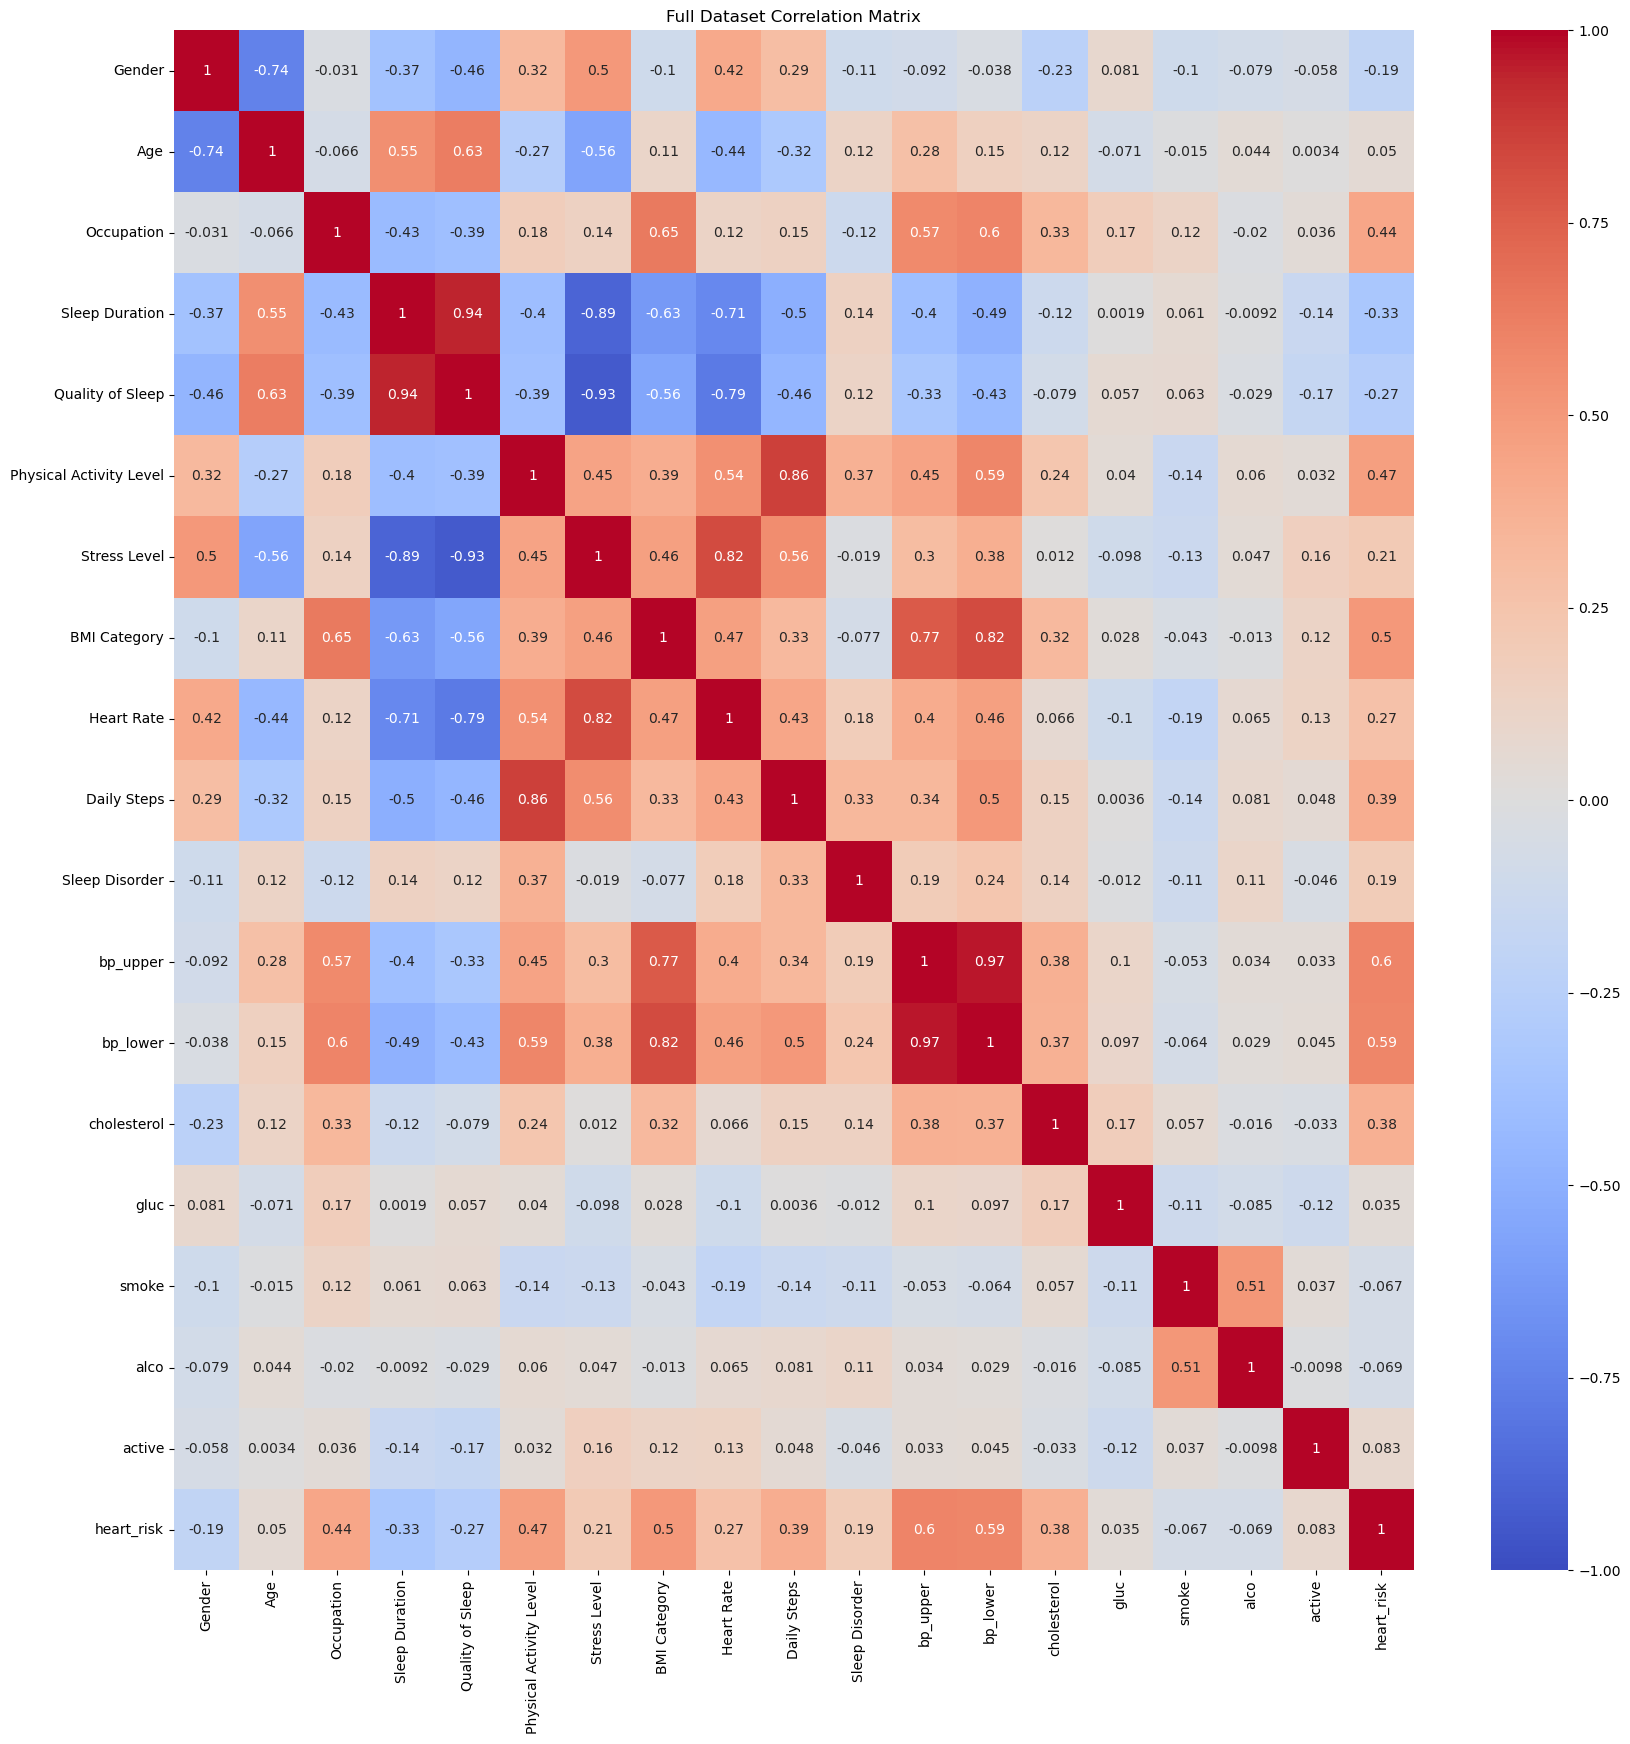

In [81]:
def plot_heatmap(dataframe, title):
    plt.figure(figsize=(20, 20))
    sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

plot_heatmap(df1, "Full Dataset Correlation Matrix")

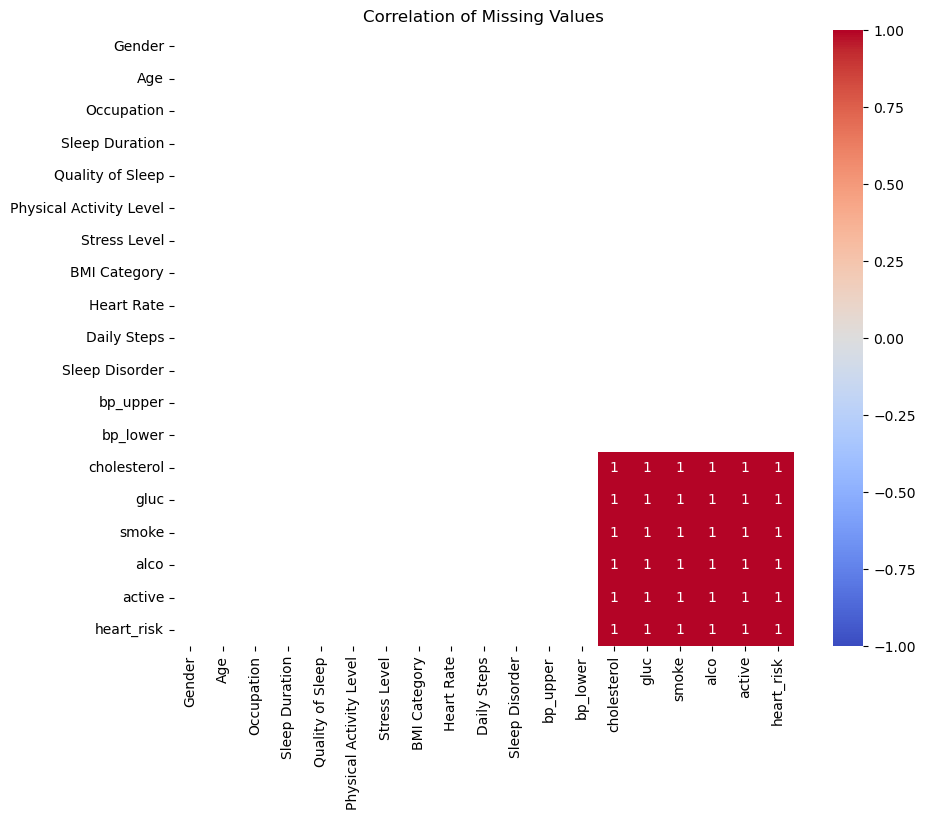

In [82]:

# Step 1: Create a Boolean DataFrame for missing values
missing_bool_df = df1.isnull()

# Step 2: Calculate the correlation matrix
missing_corr = missing_bool_df.corr()

# Step 3: Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Missing Values")
plt.show()


In [83]:
# KNN Imputation

from sklearn.impute import KNNImputer

# Assuming df is your DataFrame
imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors based on your dataset
df_imputed = pd.DataFrame(imputer.fit_transform(df1), columns=df.columns)

In [84]:
df_imputed

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bp_upper,bp_lower,cholesterol,gluc,smoke,alco,active,heart_risk
0,1.0,27.0,9.0,6.1,6.0,42.0,6.0,2.0,77.0,4200.0,1.0,126.0,83.0,1.4,1.2,0.0,0.0,0.6,0.4
1,1.0,28.0,1.0,6.2,6.0,60.0,8.0,0.0,75.0,10000.0,1.0,125.0,80.0,1.8,1.0,0.0,0.2,1.0,1.0
2,1.0,28.0,1.0,6.2,6.0,60.0,8.0,0.0,75.0,10000.0,1.0,125.0,80.0,1.8,1.0,0.0,0.2,1.0,1.0
3,1.0,28.0,6.0,5.9,4.0,30.0,8.0,1.0,85.0,3000.0,2.0,140.0,90.0,1.4,1.2,0.0,0.0,0.6,0.4
4,1.0,28.0,6.0,5.9,4.0,30.0,8.0,1.0,85.0,3000.0,2.0,140.0,90.0,1.4,1.2,0.0,0.0,0.6,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,0.0,59.0,5.0,8.1,9.0,75.0,3.0,2.0,68.0,7000.0,2.0,140.0,95.0,1.0,2.0,0.0,0.0,1.0,1.0
804,0.0,59.0,5.0,8.0,9.0,75.0,3.0,2.0,68.0,7000.0,2.0,140.0,95.0,1.0,2.0,0.0,0.0,1.0,1.0
805,0.0,59.0,5.0,8.1,9.0,75.0,3.0,2.0,68.0,7000.0,2.0,140.0,95.0,1.0,2.0,0.0,0.0,1.0,1.0
806,0.0,59.0,5.0,8.1,9.0,75.0,3.0,2.0,68.0,7000.0,2.0,140.0,95.0,1.0,2.0,0.0,0.0,1.0,1.0


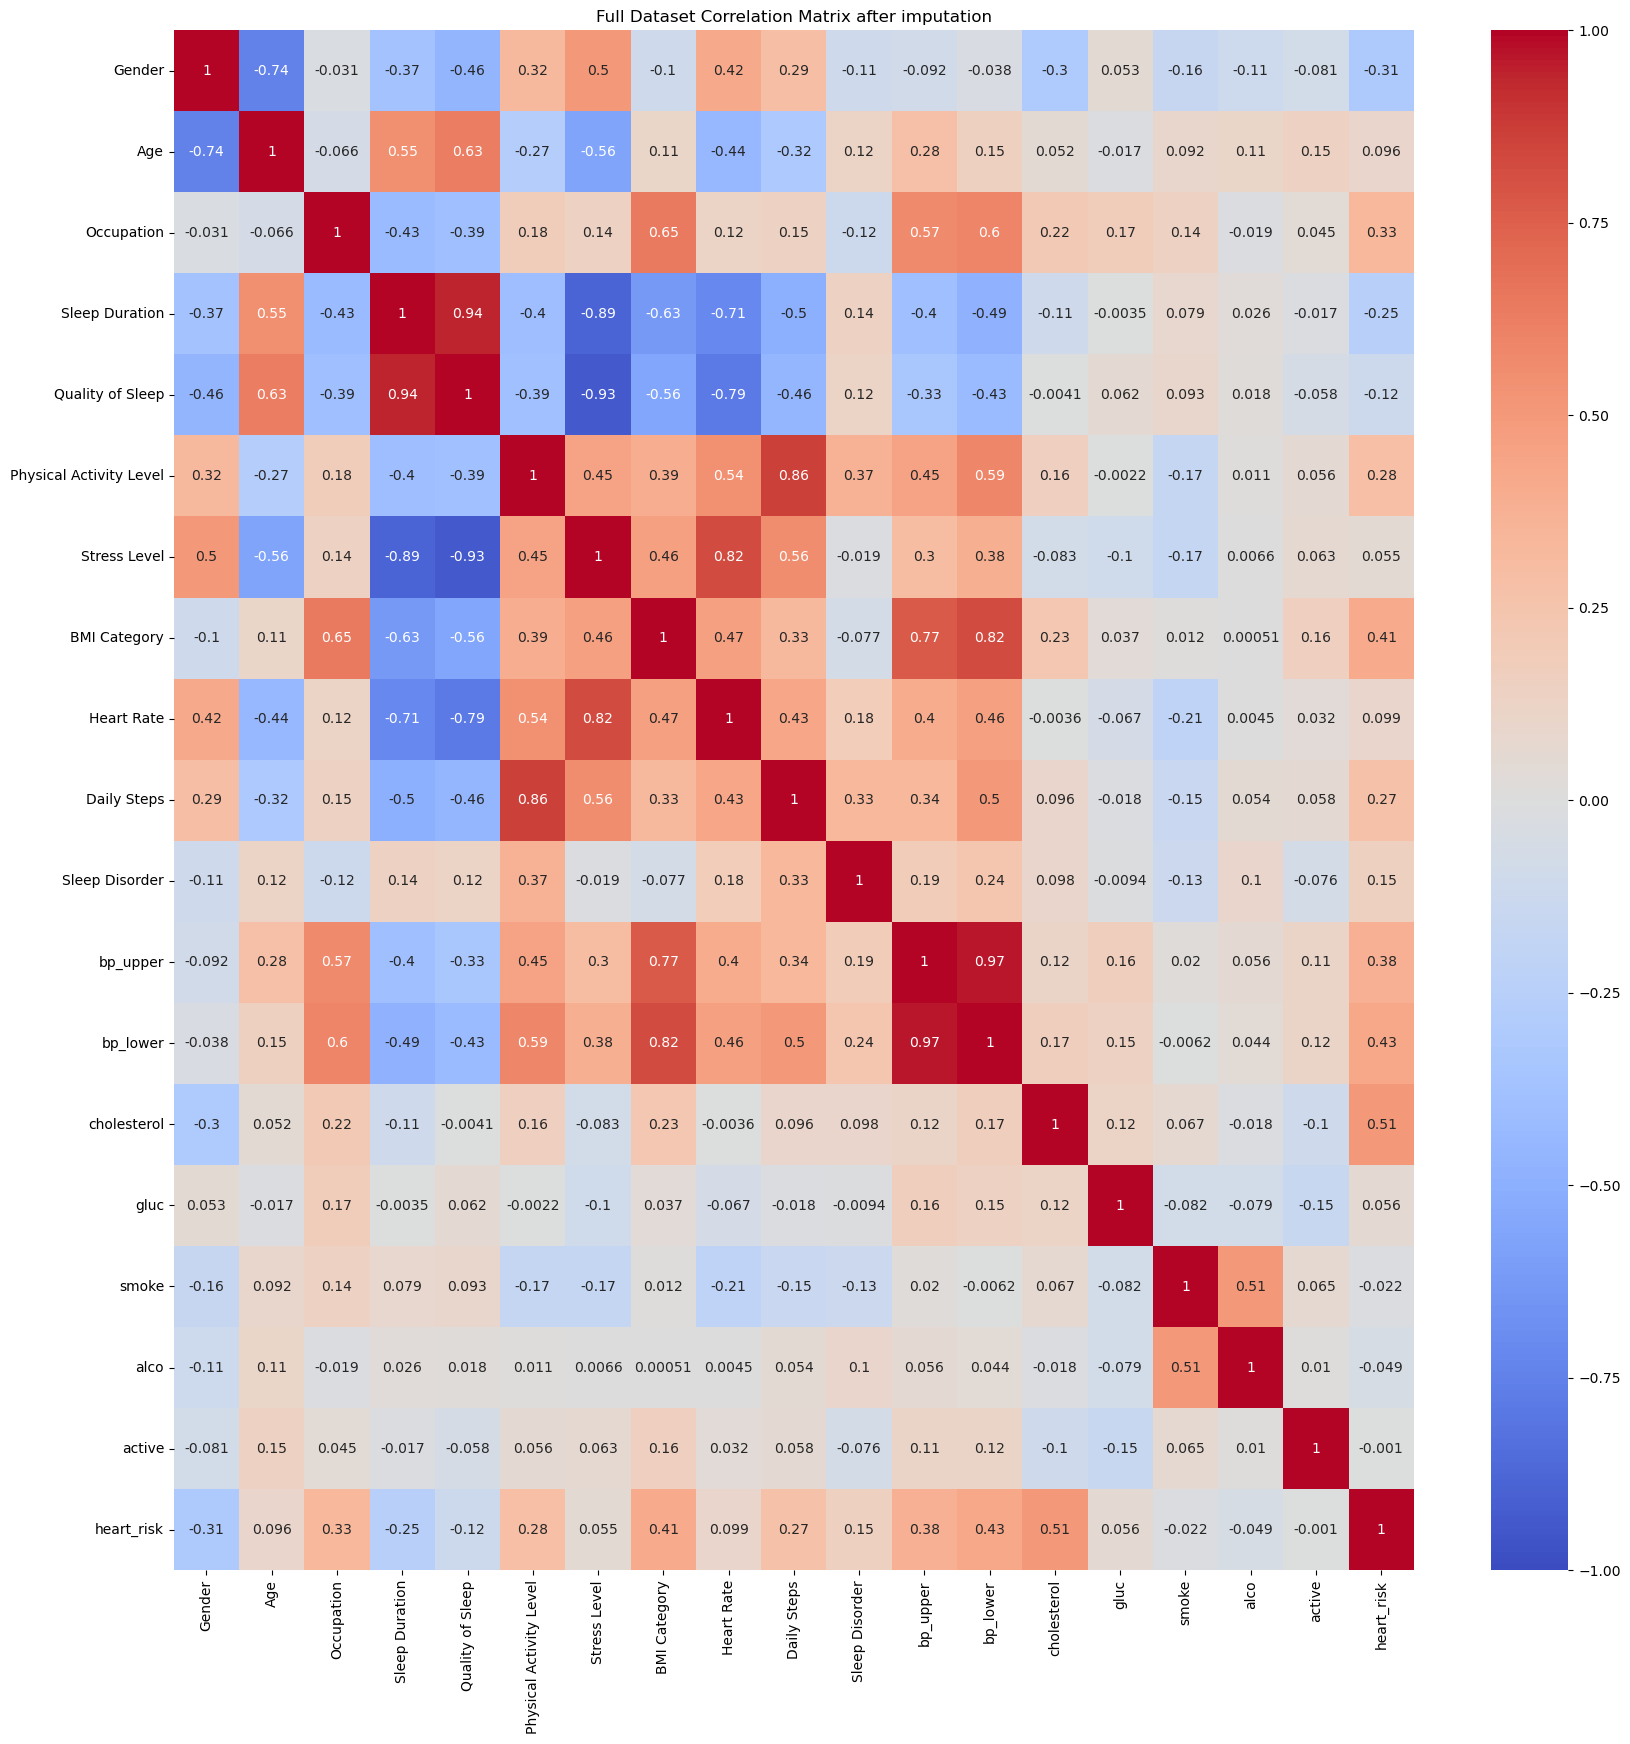

In [85]:
plot_heatmap(df_imputed, "Full Dataset Correlation Matrix after imputation")

In [86]:
# Original DataFrame correlation matrix
correlation_before = df1.corr()

# Imputed DataFrame correlation matrix
correlation_after = df_imputed.corr()


In [88]:
# Calculate the absolute difference between the two correlation matrices
correlation_diff = (correlation_before - correlation_after).abs()

# Optional: Identify significant changes
threshold = 0.1  # Define a threshold for significant changes
significant_changes = correlation_diff[correlation_diff > threshold]


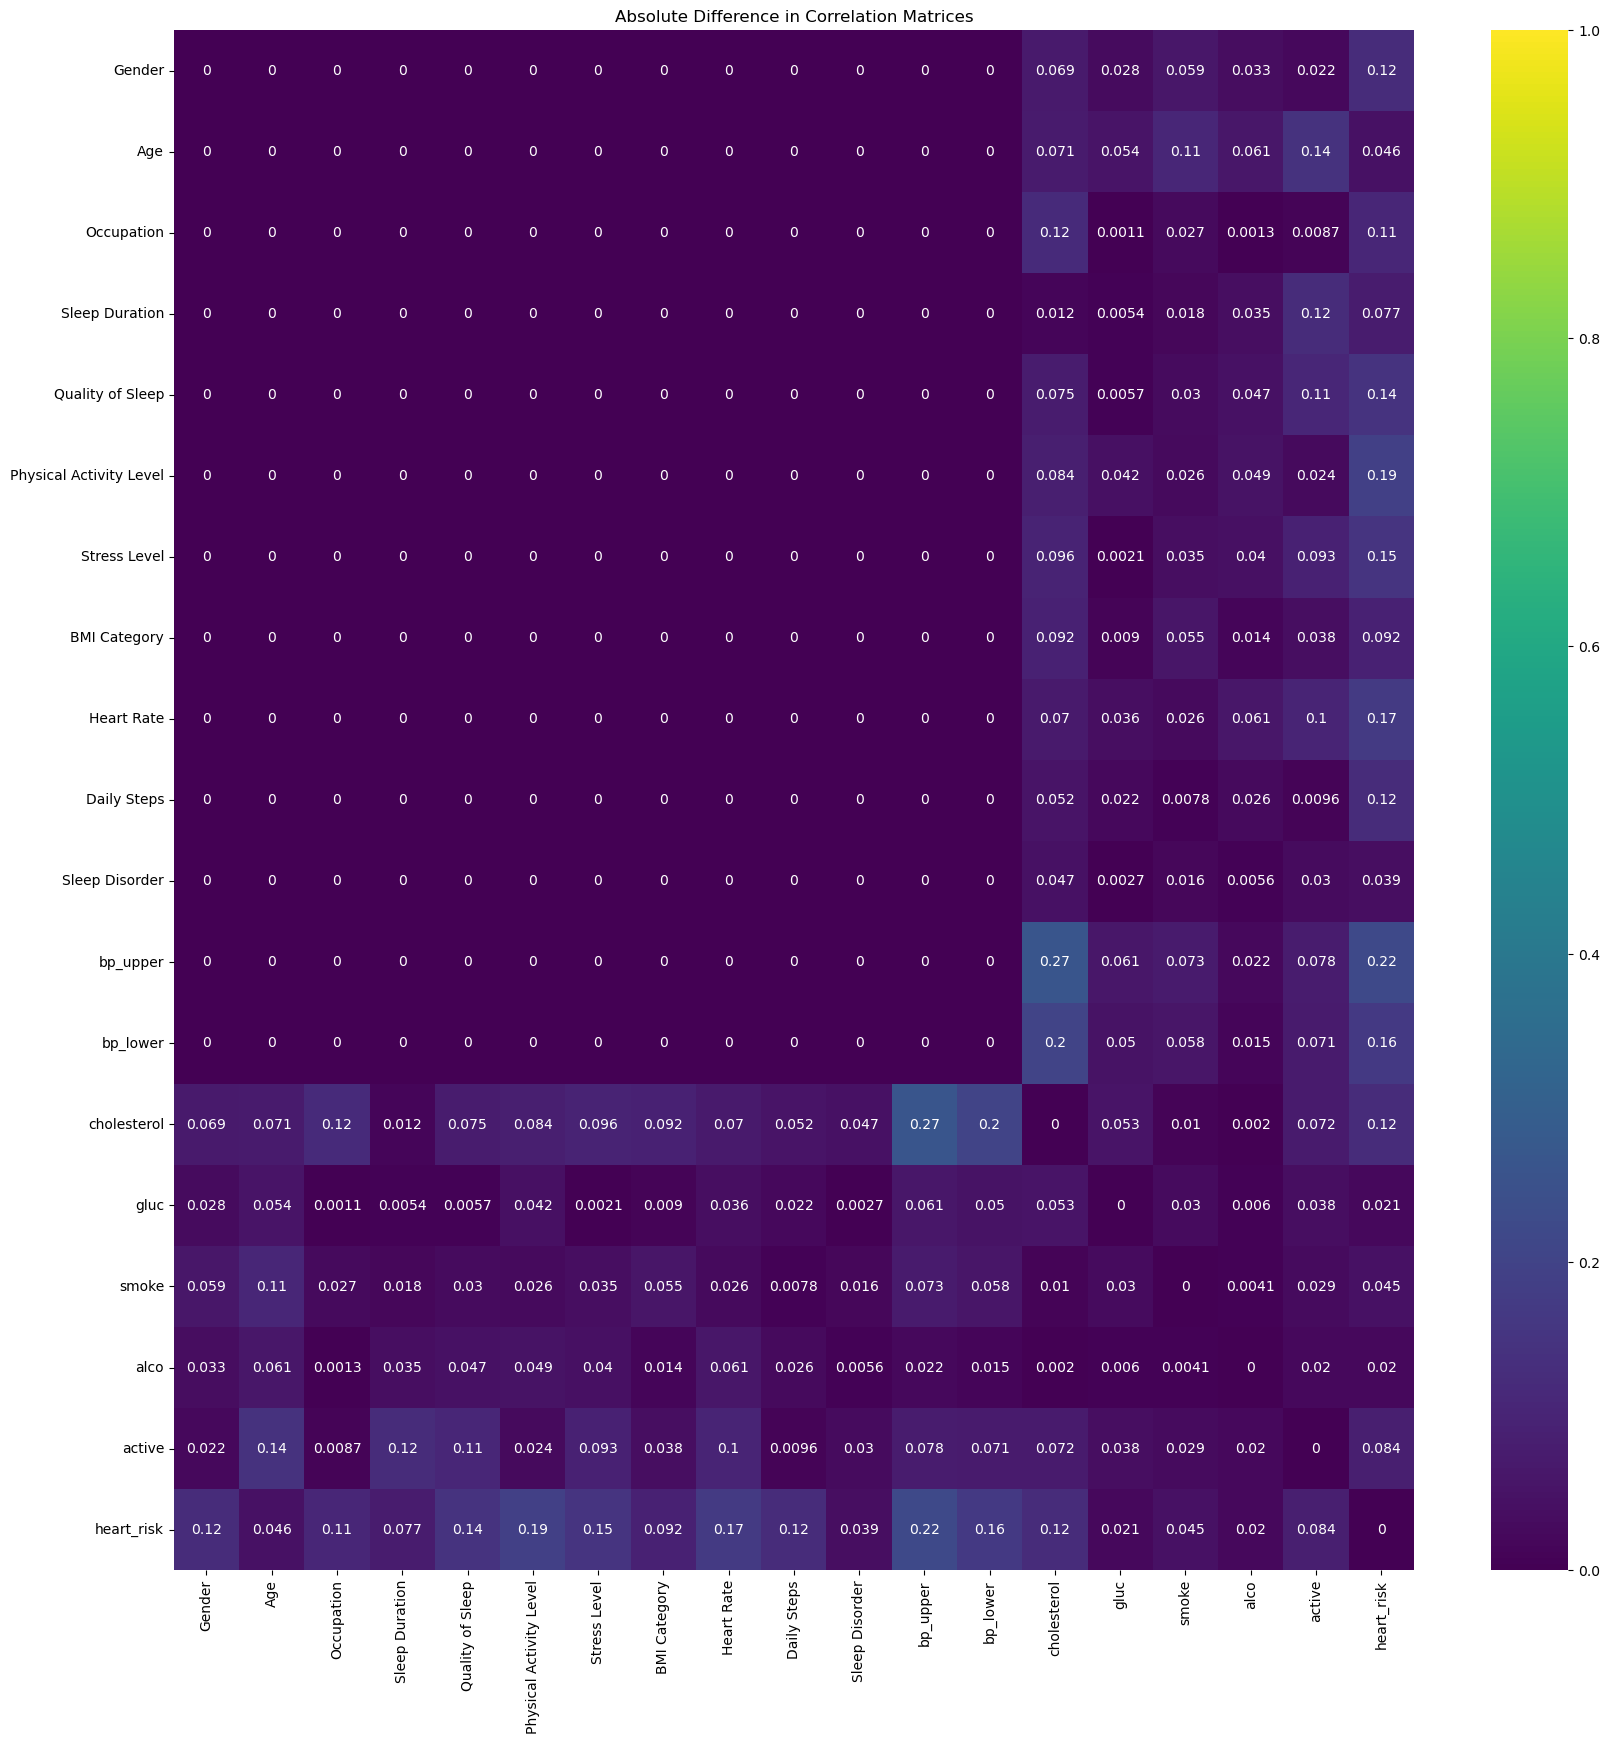

In [89]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_diff, annot=True, cmap='viridis', vmin=0, vmax=1)
plt.title('Absolute Difference in Correlation Matrices')
plt.show()


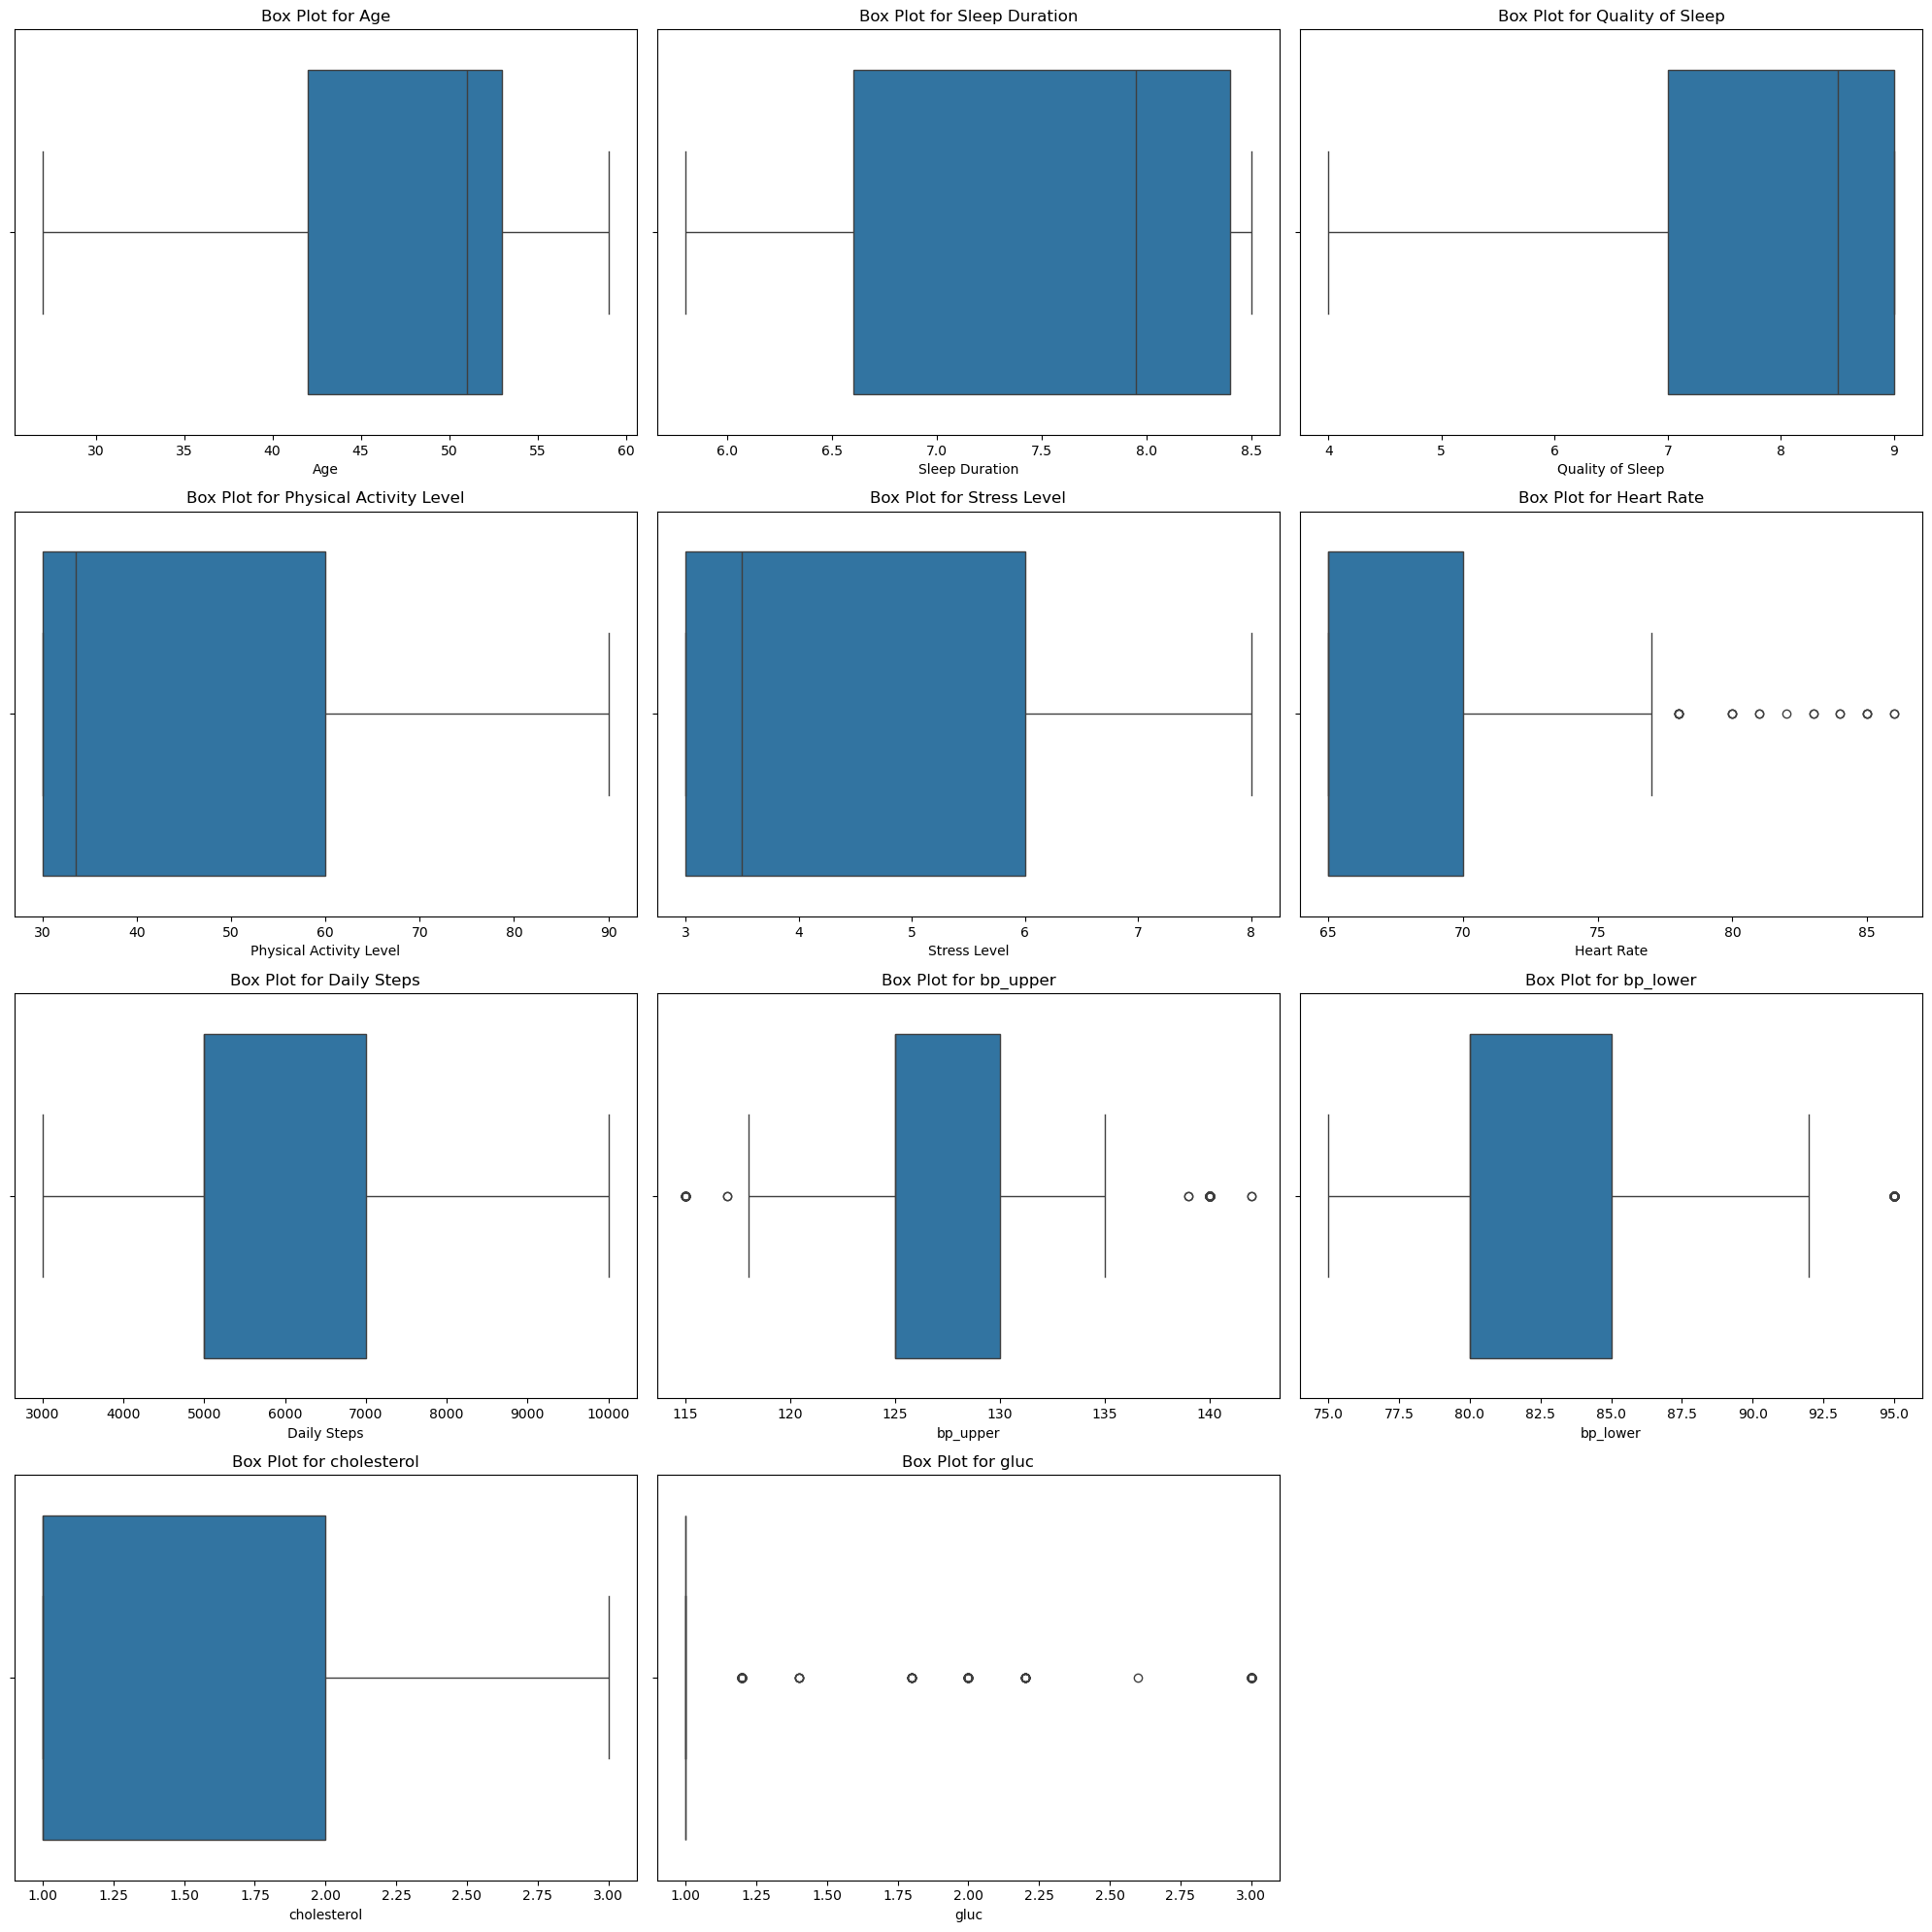

Outliers based on Z-Score:
     Gender   Age  Occupation  Sleep Duration  Quality of Sleep  \
3       1.0  28.0         6.0             5.9               4.0   
4       1.0  28.0         6.0             5.9               4.0   
5       1.0  28.0         9.0             5.9               4.0   
6       1.0  29.0        10.0             6.3               6.0   
90      0.0  34.0         8.0             5.8               4.0   
..      ...   ...         ...             ...               ...   
737     0.0  54.0         2.0             8.4               9.0   
748     0.0  54.0         2.0             8.4               9.0   
759     0.0  54.0         2.0             8.5               9.0   
764     0.0  55.0         5.0             8.1               9.0   
765     0.0  55.0         5.0             8.1               9.0   

     Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
3                       30.0           8.0           1.0        85.0   
4                       

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Example: Use the numeric columns from your dataset
numeric_columns = [
    'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
    'Stress Level', "Heart Rate", 'Daily Steps', 'bp_upper', 
    'bp_lower', 'cholesterol', 'gluc'
]

# 1. Visual Outlier Detection: Box Plots
num_columns = len(numeric_columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)  # Calculate number of rows needed

plt.figure(figsize=(20, 5 * num_rows))
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 3, i + 1)  # Adjust subplot arrangement dynamically
    sns.boxplot(data=df_imputed, x=column)
    plt.title(f'Box Plot for {column}')
plt.tight_layout()
plt.show()

# 2. Statistical Outlier Detection: Z-Score
z_scores = np.abs(stats.zscore(df_imputed[numeric_columns]))
threshold = 3  # Set the threshold for Z-score
outliers_z = (z_scores > threshold)

# Displaying outlier rows
print("Outliers based on Z-Score:")
print(df_imputed[outliers_z.any(axis=1)])  # Any row with at least one outlier


In [91]:
df_imputed.to_csv('imputed_cardio_sleep.csv', index=False)

In [93]:
df_imputed.smoke.value_counts()

smoke
0.0    747
1.0     50
0.4     11
Name: count, dtype: int64